# Learning outcome
1. Load, display and save images.
2. Load, show, and save videos.
3. Resize images

## Why OpenCV
 - Compatible in multiple major os, lke windows, linux and macos, can be 
 written in different languages: c++, python and java.
 - Interoperable with Numpy module, thereby faster computation of image array
 - Large community support, a lot of resources online (articles and stackoverflow posts)

## Image formats
 - jpeg (.jpg, .jpeg, .jfif - obsolete)
   - photos taken from camera
 - PNG (.png)
   - website, larger file size compared to jpeg
 - tiff (.tif)
   - high-quality printing, large file size
 - bmp (.bmp)
   - multiple uses, large file size
 - gif (.gif) (opencv cant deal with this)
   - animations, shallow color depth
 - webp (.webp)
   - smaller file size compared to jpeg, png, IE 11 not supported

## Setup

In [5]:
import sys

#Python 3.7 required
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv

In [6]:
#OpenCV Version
print(cv.__version__)

4.8.0


## Load and show images

In [4]:
img = cv.imread("images/lena.jfif")
#second argument: 1 (default), 0(grayscale), -1(cv.IMREAD_UNCHANGED)
grayscale = cv.imread("images/lena.jfif", 0)

cv.imshow("lena_color", img)
cv.imshow("lena_grayscale", grayscale)
cv.waitKey(0)   #Key binding function: wait for user response
cv.destroyAllWindows()

In [3]:
def show_img(window_name, img):
    """2 arguments: window name and image"""
    cv.imshow(window_name, img)
    cv.waitKey(0)   #Key binding function: wait for user response
    cv.destroyAllWindows()

In [6]:
img = cv.imread("images/lena.png")

In [7]:
show_img("lena", img)

In [8]:
img_jpeg = cv.imread("images/lena.jfif", -1)
img_png = cv.imread("images/lena.png", -1)

print(f"shape of jpeg images: {img_jpeg.shape}")
print(f"shape of jpeg images: {img_png.shape}")      

shape of jpeg images: (225, 225, 3)
shape of jpeg images: (225, 225, 4)


In [1]:
!pip install imageio

                                              0.0/313.2 kB ? eta -:--:--
     -----------------                      143.4/313.2 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 313.2/313.2 kB 3.2 MB/s eta 0:00:00


In [2]:
import imageio

In [11]:
#gif
GIF = imageio.mimread("images/rotating_earth_large.gif")

#change from RGB to BGR
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in GIF]

for img in imgs:
    cv.imshow("GIF", img)
    cv.waitKey(20)
    
cv.destroyAllWindows()

## save images
   cv.imwrite(filepath, img)

In [13]:
#a more formalized approach
img = cv.imread(cv.samples.findFile("images/lena.jfif"))

if img is None:
    sys.exit("Not a valid filepath")
    
cv.imshow("img", img)
k = cv.waitKey(0) & 0xFF
if k == 115: #115 ascii code for key "s" or if k == ord('s')
    cv.imwrite("lena_save.jpg", img)
    
cv.destroyAllWindows()

## Same operations on videos

Load and show videos

In [20]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No video file is found")
    
cv.namedWindow("frame", cv.WINDOW_NORMAL)
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cap.release()
cv.destroyAllWindows()

In [26]:
#Webcam, use laptop/pc that has a working webcam
cap = cv.VideoCapture(0) #webcam

if not cap.isOpened():
    sys.exit("No webcam found")
    
#save video object
#arguments: filepath, fourcc, fps, width and height
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 15
w, h = int(cap.get(3)), int(cap.get(4))
out = cv.VideoWriter("videos/out.avi", fourcc, fps, (w,h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    out.write(frame)
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

cap.release()
out.release()
cv.destroyALlWindows()

SystemExit: No webcam found

In [28]:
import time

In [31]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No video file is found")
    
cv.namedWindow("frame", cv.WINDOW_NORMAL)
start = time.time()
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
 
end = time.time()
#cap.release()
cv.destroyAllWindows()

No frame received!


In [32]:
print(f"The actual frame rate from the file: {cap.get(5)}")
n_frames = cap.get(7)
print(f"The fps if stream using OpenCV: {n_frames / (end - start)}")

The actual frame rate from the file: 60.0
The fps if stream using OpenCV: 61.50020550669125


## Image resizing
1. set arbitrary dimension (w, h).
2. scale factor

In [37]:
# 1 method: arbitrary dimension
img = cv.imread("images/soccer.jpg")

new_height = 300
new_width = 450

#numpy is (height, width) but cv resize is (width, height)

#3rd = fx, 4th = fy, 5th = interpolation method (default: bilinear)
img_resize = cv.resize(img, (new_width, new_height))

cv.imshow("original", img)
show_img("resize", img_resize)

In [36]:
img.shape

(1200, 800, 3)

In [38]:
# 2 method: scale factor
img = cv.imread("images/lena.jfif")

#If width is set to 300, what is the height? (while keeping the aspect ratio constant)
img_resize = cv.resize(img, None, fx=1.5, fy=1.5)
cv.imshow("original", img)
show_img("resize", img_resize)

## Exercise 1

In [3]:
img_dog = cv.imread(cv.samples.findFile("images/dog.jfif"))

if img_dog is None:
    sys.exit("Not a valid file path")
    
cv.imshow("dog", img_dog)
k = cv.waitKey(0) & 0xFF
if k == 115:
    cv.imwrite("dog_save.png", img_dog)
    
cv.destroyAllWindows()

## Exercise 2

In [6]:
#1ST WAY
img_color = cv.imread(cv.samples.findFile("images/dog.jfif"))
img_grayscale = cv.imread(cv.samples.findFile("images/dog.jfif"), 0)
img_grayscale2 = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

if img_color is None or img_grayscale is None:
    sys.exit("Invalid file path")
    
cv.imshow("color", img_color)
cv.imshow("grayscale", img_grayscale)

cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
#2ND WAY
import matplotlib.pyplot as plt

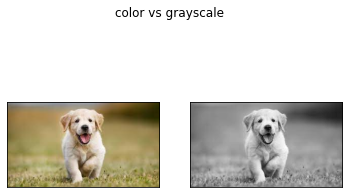

In [13]:
img_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(img_grayscale2, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle("color vs grayscale")
plt.show()

In [19]:
#3RD WAY :concatenation
gray = cv.cvtColor(img_grayscale2, cv.COLOR_GRAY2BGR)

img_combined = np.hstack((img_color, gray))

##or

img_combined2 = np.concatenate((img_color, gray), axis=1)
show_img("joined", img_combined2)


## Exercise 3

In [2]:

import cv2 as cv
cap = cv.VideoCapture("img_pexels.mp4")

if not cap.isOpened():
    sys.exit("The file does not exist")

cv.namedWindow("frame", cv.WINDOW_NORMAL)

fourcc = cv.VideoWriter_fourcc(*'mp4v')
fps = 60
w, h = int((int(cap.get(3)) / 2)), int((int(cap.get(4)) / 2)) 
print(f"{w},  {h}")

out = cv.VideoWriter('smaller_img_pexels.mp4', fourcc, fps, (w,h))

while True:
    ret, frame = cap.read()
    
    frame = cv.resize(frame, (w,h))
    if not ret:
        print("No frame received!")
        break
        
    out.write(frame)
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()

540,  960


## Exercise 4

In [13]:
#1. Linear interpolation
img = cv.imread("dog.jfif")
img_linear = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_LINEAR)

show_img("Linear interpolation", img_linear)


#2. Cubic interpolation
img = cv.imread("dog.jfif")
img_cubic = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_CUBIC)

show_img("Cubic Interpolation", img_cubic)


#3. nearest neighbor interpolation
img = cv.imread("dog.jfif")
img_nearest = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_NEAREST)

show_img("Nearest neighbor interpolation", img_nearest)

## Comments regarding three of the interpolation methods used

- Linear Interpolation
  - Smoothest 
  
- Cubic Interpolation
  - In between linear and nearest neighbor interpolation
  
- Nearest Neighbor Interpolation
  - Most pixelated among two other methods